In [1]:
# imports

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Constants

PREPARATION_PATH='data/preparation/'
PROCESSED_FILENAME=PREPARATION_PATH + 'Life Expectancy Data Processed.csv'

In [3]:
df = pd.read_csv(PROCESSED_FILENAME)
df.head()

,Life expectancy,Alcohol,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Status_Developing
0,65.0,0.000787,0.341041,0.045515,0.243594,0.228696,-0.316865,0.722330,0.317387,0.008405,0.016219,0.250312,1.257301,1.245672,0.323911,True
1,59.9,0.000787,0.311124,0.019405,0.237217,0.236962,0.238026,0.724332,0.285764,0.008405,0.017008,0.002431,1.279231,1.260073,0.320355,True
2,59.9,0.000787,0.331069,0.016960,0.230840,0.245228,0.280710,0.719328,0.306846,0.008405,0.017537,0.235437,1.293851,1.274474,0.313243,True
3,59.5,0.000787,0.360985,0.109923,0.224463,0.256250,0.334064,0.758355,0.338469,0.008405,0.018598,0.027430,1.308471,1.296075,0.304945,True
4,59.2,0.000787,0.370957,0.118837,0.219362,0.267272,0.344735,0.693311,0.349010,0.008405,0.001764,0.022100,1.330400,1.310476,0.294277,True


In [4]:
# Features and Targets

X = df.drop('Life expectancy ', axis=1)
y = df['Life expectancy ']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [5]:
# train

model = LinearRegression()
model.fit(X_train, y_train)

feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': model.coef_})
feature_importance['Coefficient'] = np.abs(feature_importance['Coefficient'])
feature_importance.sort_values(by='Coefficient', ascending=False, inplace=True)
feature_importance

,Feature,Coefficient
13,Income composition of resources,18.298718
8,HIV/AIDS,6.970174
3,BMI,4.678379
7,Diphtheria,3.125278
9,GDP,2.613051
5,Polio,2.441530
14,Status_Developing,2.313614
4,under-five deaths,2.157346
0,Alcohol,1.565614
1,Hepatitis B,1.546498


Mean Absolute Error: 3.420978235250308
Mean Squared Error: 21.38203466001634
Root Mean Squared Error: 4.6240712213390855
R-squared: 0.6890194988326898


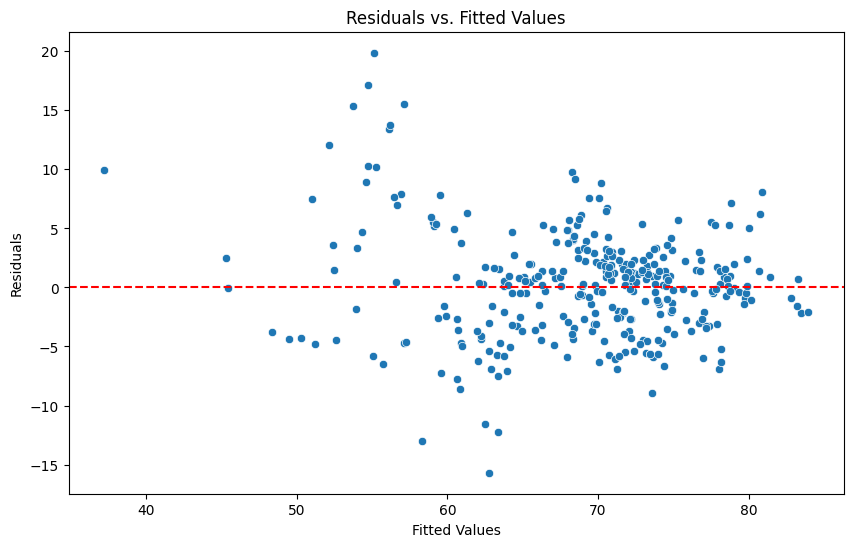

In [6]:
# test

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
residuals = y_test - y_pred
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")


plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [7]:
X_test.head(10)

,Alcohol,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Status_Developing
1575,0.575242,0.660147,0.094344,0.719302,0.016532,0.632852,0.547213,0.644158,0.075645,0.050765,0.003498,0.197367,0.201612,0.594177,True
913,0.041707,0.660147,0.073676,0.476984,0.011022,0.654194,0.316057,0.654699,0.008405,0.049398,0.021646,0.577481,0.554432,0.675968,True
838,0.000787,0.640203,0.007060,0.048464,0.016532,0.611510,1.020531,0.633617,0.756450,0.035574,0.002151,0.467833,0.446426,0.323911,True
1062,0.023608,0.610287,0.007494,0.252521,0.179099,-0.284852,0.097911,-0.272909,0.042025,0.027419,0.038255,0.957596,0.957656,0.366585,True
420,0.909686,0.620259,0.000000,0.718027,0.000000,0.654194,0.556219,0.654699,0.008405,0.871282,0.001215,0.065789,0.072004,0.747090,False
1374,0.580751,0.410845,0.045989,0.062493,0.209409,0.376748,0.737341,0.380633,2.017201,0.074445,0.336205,1.125723,1.303276,0.501718,True
670,0.151877,-0.017954,1.745593,0.190028,4.959677,0.355406,0.340074,-0.293991,0.025215,0.027523,0.888239,1.973671,2.008917,0.415185,True
817,0.648426,0.670119,0.000000,0.718027,0.000000,0.664864,0.521195,0.665240,0.008405,0.142545,0.016976,0.190057,0.187211,0.658187,False
1310,0.025969,0.530510,0.000000,0.248695,0.110215,0.515471,0.441141,0.517666,0.058835,0.021482,0.083480,0.833328,0.813647,0.248047,True
35,0.044068,0.640203,0.004417,0.701447,0.066129,0.632852,0.435137,0.633617,0.008405,0.150797,0.273188,0.431284,0.417624,0.614328,True


In [8]:
y_pred[0:10]

array([72.39987044, 73.55771025, 60.82205987, 60.43074342, 79.78075866,
       52.3814199 , 55.26823372, 76.52012062, 63.4551127 , 73.94760622])